In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import scipy.stats as ss

In [40]:
crashes_sample = pd.read_csv("crashes.sample2020.csv")
vehicles_sample = pd.read_csv("vehicles.sample.csv")
people_sample = pd.read_csv("people.sample.csv")

/Users/shellylin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21,40,41,42,44,48,49,50,58,59,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
crashes_sample.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)


In [70]:
vehicles_sample.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,228894,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,1,DRIVER,NaN,224185.0,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228895,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,2,PARKED,NaN,224187.0,NaN,GENERAL MOTORS CORP.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,228896,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,3,PARKED,NaN,224191.0,NaN,SATURN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,228905,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,1,DRIVER,NaN,224199.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228906,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,2,DRIVERLESS,NaN,224203.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
people_sample.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O925562,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O925563,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877518.0,07/26/2020 01:50:00 AM,NaN,CHICAGO,IL,60653,...,NaN,OTHER,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O925608,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877558.0,07/26/2020 03:44:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST REFUSED,NaN,NaN
3,O925609,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877560.0,07/26/2020 03:44:00 AM,NaN,EVANSTON,IL,60201,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O925693,DRIVER,b19286bd551b80e04f20663d46a3fae8238a8f40ddee4c...,JD310543,877642.0,07/26/2020 11:50:00 AM,NaN,CHICAGO,IL,60638,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [72]:
crashes_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33408 non-null  object 
 1   RD_NO                          33021 non-null  object 
 2   CRASH_DATE_EST_I               2337 non-null   object 
 3   CRASH_DATE                     33408 non-null  object 
 4   POSTED_SPEED_LIMIT             33408 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         33408 non-null  object 
 6   DEVICE_CONDITION               33408 non-null  object 
 7   WEATHER_CONDITION              33408 non-null  object 
 8   LIGHTING_CONDITION             33408 non-null  object 
 9   FIRST_CRASH_TYPE               33408 non-null  object 
 10  TRAFFICWAY_TYPE                33408 non-null  object 
 11  LANE_CNT                       10996 non-null  float64
 12  ALIGNMENT                      33408 non-null 

In [73]:
vehicles_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75673 entries, 0 to 75672
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_UNIT_ID             75673 non-null  int64  
 1   CRASH_RECORD_ID           75673 non-null  object 
 2   RD_NO                     67544 non-null  object 
 3   CRASH_DATE                75673 non-null  object 
 4   UNIT_NO                   75673 non-null  int64  
 5   UNIT_TYPE                 75561 non-null  object 
 6   NUM_PASSENGERS            11633 non-null  float64
 7   VEHICLE_ID                73804 non-null  float64
 8   CMRC_VEH_I                1514 non-null   object 
 9   MAKE                      73804 non-null  object 
 10  MODEL                     73787 non-null  object 
 11  LIC_PLATE_STATE           67639 non-null  object 
 12  VEHICLE_YEAR              61945 non-null  float64
 13  VEHICLE_DEFECT            73804 non-null  object 
 14  VEHICL

In [74]:
people_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82049 entries, 0 to 82048
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PERSON_ID              82049 non-null  object 
 1   PERSON_TYPE            82049 non-null  object 
 2   CRASH_RECORD_ID        82049 non-null  object 
 3   RD_NO                  73689 non-null  object 
 4   VEHICLE_ID             80306 non-null  float64
 5   CRASH_DATE             82049 non-null  object 
 6   SEAT_NO                17214 non-null  float64
 7   CITY                   60863 non-null  object 
 8   STATE                  61749 non-null  object 
 9   ZIPCODE                55588 non-null  object 
 10  SEX                    80776 non-null  object 
 11  AGE                    59254 non-null  float64
 12  DRIVERS_LICENSE_STATE  48594 non-null  object 
 13  DRIVERS_LICENSE_CLASS  41798 non-null  object 
 14  SAFETY_EQUIPMENT       81792 non-null  object 
 15  AI

In [75]:
crashes_sample.isnull().mean().round(100)

CRASH_RECORD_ID                  0.000000
RD_NO                            0.011584
CRASH_DATE_EST_I                 0.930047
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
LANE_CNT                         0.670857
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.027987
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.763739
NOT_RIGHT_OF_WAY_I               0.952616
HIT_AND_RUN_I                    0.709830
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0

In [5]:
sum(crashes_sample.isnull().mean().round(2) > 0.55) # crashes_sample - 11/49 columns have > 55% missing values

11

In [77]:
sum(crashes_sample.isnull().mean().round(50) == 0) # crashes_sample - 25/49 columns have 0 missing value

25

In [20]:
# 4 columns of People_sample have 0 missing values
people_sample[[column for column in people_sample if people_sample[column].isnull().mean().round(50) == 0]]

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE
0,O925562,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,07/26/2020 01:50:00 AM
1,O925563,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,07/26/2020 01:50:00 AM
2,O925608,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,07/26/2020 03:44:00 AM
3,O925609,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,07/26/2020 03:44:00 AM
4,O925693,DRIVER,b19286bd551b80e04f20663d46a3fae8238a8f40ddee4c...,07/26/2020 11:50:00 AM
...,...,...,...,...
82044,P211331,PASSENGER,77c6896f7590443e32852c8ab7c1b60d1b05dec415263b...,07/25/2020 04:50:00 PM
82045,P211347,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,07/25/2020 05:25:00 PM
82046,P211349,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,07/25/2020 05:25:00 PM
82047,P211350,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,07/25/2020 05:25:00 PM


In [78]:
vehicles_sample.isnull().mean().round(2)

CRASH_UNIT_ID              0.00
CRASH_RECORD_ID            0.00
RD_NO                      0.11
CRASH_DATE                 0.00
UNIT_NO                    0.00
                           ... 
CARGO_BODY_TYPE            0.99
LOAD_TYPE                  0.99
HAZMAT_OUT_OF_SERVICE_I    0.99
MCS_OUT_OF_SERVICE_I       0.99
HAZMAT_CLASS               1.00
Length: 72, dtype: float64

In [79]:
sum(vehicles_sample.isnull().mean().round(2) > 0.55) # vehicles_sample - 54/72 columns have > 50% missing values

54

In [80]:
people_sample.isnull().mean().round(10)

PERSON_ID                0.000000
PERSON_TYPE              0.000000
CRASH_RECORD_ID          0.000000
RD_NO                    0.101890
VEHICLE_ID               0.021243
CRASH_DATE               0.000000
SEAT_NO                  0.790199
CITY                     0.258212
STATE                    0.247413
ZIPCODE                  0.322502
SEX                      0.015515
AGE                      0.277822
DRIVERS_LICENSE_STATE    0.407744
DRIVERS_LICENSE_CLASS    0.490573
SAFETY_EQUIPMENT         0.003132
AIRBAG_DEPLOYED          0.020415
EJECTION                 0.013333
INJURY_CLASSIFICATION    0.000609
HOSPITAL                 0.799534
EMS_AGENCY               0.874636
EMS_RUN_NO               0.979439
DRIVER_ACTION            0.211825
DRIVER_VISION            0.211898
PHYSICAL_CONDITION       0.211106
PEDPEDAL_ACTION          0.979927
PEDPEDAL_VISIBILITY      0.979951
PEDPEDAL_LOCATION        0.979939
BAC_RESULT               0.210825
BAC_RESULT VALUE         0.998367
CELL_PHONE_USE

In [81]:
# vehicles_sample - 9/30 columns have > 50% missing values
sum(people_sample.isnull().mean().round(50) > 0.55)

9

In [82]:
# vehicles_sample - 7/30 columns have > 80% missing values
sum(people_sample.isnull().mean().round(50) > 0.80) 

7

In [83]:
sum(people_sample.isnull().mean().round(50) > 0.90) # vehicles_sample - 6/30 columns have > 90% missing values

6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcba40744c0>,
      dtype=object)

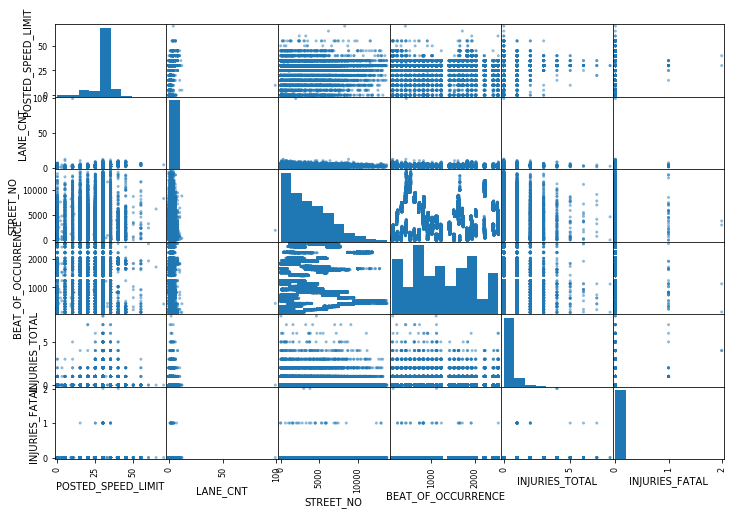

In [84]:
# correlation of crashes numerical columns
from pandas.plotting import scatter_matrix
attributes = ["POSTED_SPEED_LIMIT", "LANE_CNT", "STREET_NO", "BEAT_OF_OCCURRENCE", "INJURIES_TOTAL", "INJURIES_FATAL" ]
scatter_matrix(crashes_sample[attributes], figsize=(12, 8))

### Analysis of crashes_sample

In [85]:
crashes_info = crashes_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33408 non-null  object 
 1   RD_NO                          33021 non-null  object 
 2   CRASH_DATE_EST_I               2337 non-null   object 
 3   CRASH_DATE                     33408 non-null  object 
 4   POSTED_SPEED_LIMIT             33408 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         33408 non-null  object 
 6   DEVICE_CONDITION               33408 non-null  object 
 7   WEATHER_CONDITION              33408 non-null  object 
 8   LIGHTING_CONDITION             33408 non-null  object 
 9   FIRST_CRASH_TYPE               33408 non-null  object 
 10  TRAFFICWAY_TYPE                33408 non-null  object 
 11  LANE_CNT                       10996 non-null  float64
 12  ALIGNMENT                      33408 non-null 

In [86]:
crashes_sample.groupby(['DEVICE_CONDITION']).size()

DEVICE_CONDITION
FUNCTIONING IMPROPERLY        170
FUNCTIONING PROPERLY        11775
MISSING                         5
NO CONTROLS                 19287
NOT FUNCTIONING               113
OTHER                         267
UNKNOWN                      1780
WORN REFLECTIVE MATERIAL       11
dtype: int64

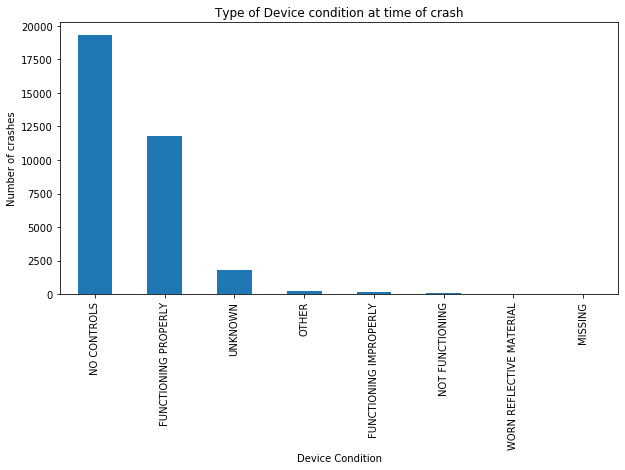

In [87]:
# Plotting a Histogram of Device Condition
crashes_sample.DEVICE_CONDITION.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Type of Device condition at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('Device Condition');

In [88]:
crashes_sample.groupby(['POSTED_SPEED_LIMIT']).size() # speed limit 30 is the highest POSTED_SPEED_LIMIT

POSTED_SPEED_LIMIT
0       372
1         3
2         2
3         7
4         1
5       243
9         3
10      672
11        1
15     1147
20     1313
24        1
25     2112
30    24561
32        1
33        2
35     2398
39        1
40      345
45      178
50        9
55       32
60        2
65        1
70        1
dtype: int64

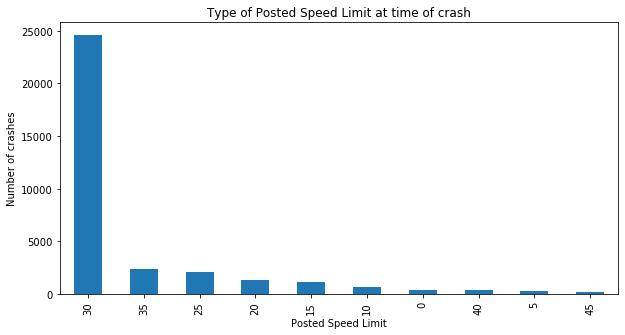

In [89]:
# Plotting a Histogram of Posted Speed Limit
crashes_sample.POSTED_SPEED_LIMIT.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Type of Posted Speed Limit at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('Posted Speed Limit');

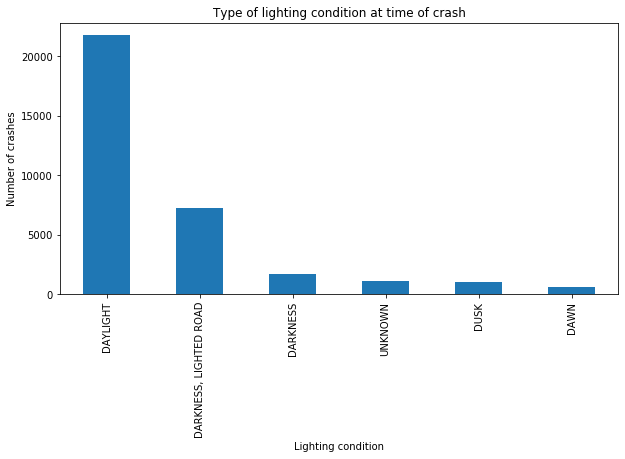

In [90]:
# Plotting a Histogram of Lighting condition
crashes_sample.LIGHTING_CONDITION.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Type of lighting condition at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('Lighting condition');

In [91]:
crashes_sample.groupby(['LIGHTING_CONDITION']).size()

LIGHTING_CONDITION
DARKNESS                   1690
DARKNESS, LIGHTED ROAD     7230
DAWN                        622
DAYLIGHT                  21747
DUSK                       1007
UNKNOWN                    1112
dtype: int64

In [92]:
crashes_sample.groupby(['FIRST_CRASH_TYPE']).size()

FIRST_CRASH_TYPE
ANGLE                           3618
ANIMAL                            26
FIXED OBJECT                    1685
HEAD ON                          292
OTHER NONCOLLISION               111
OTHER OBJECT                     362
OVERTURNED                        19
PARKED MOTOR VEHICLE            7573
PEDALCYCLIST                     506
PEDESTRIAN                       847
REAR END                        7737
REAR TO FRONT                    220
REAR TO REAR                      57
REAR TO SIDE                     144
SIDESWIPE OPPOSITE DIRECTION     479
SIDESWIPE SAME DIRECTION        4957
TRAIN                              3
TURNING                         4772
dtype: int64

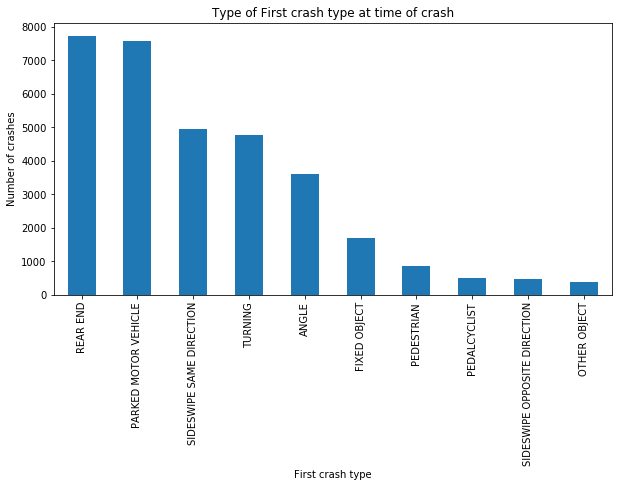

In [93]:
# Plotting a Histogram of First crash type
crashes_sample.FIRST_CRASH_TYPE.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Type of First crash type at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('First crash type');

In [94]:
crashes_sample.groupby(['TRAFFIC_CONTROL_DEVICE']).size() # NO CONTROLS has highest 19052 => valuable columns

TRAFFIC_CONTROL_DEVICE
BICYCLE CROSSING SIGN           1
DELINEATORS                     8
FLASHING CONTROL SIGNAL         9
LANE USE MARKING               91
NO CONTROLS                 19052
NO PASSING                      2
OTHER                         217
OTHER RAILROAD CROSSING        11
OTHER REG. SIGN                48
OTHER WARNING SIGN             28
PEDESTRIAN CROSSING SIGN       12
POLICE/FLAGMAN                 20
RAILROAD CROSSING GATE         17
RR CROSSING SIGN                1
SCHOOL ZONE                    12
STOP SIGN/FLASHER            3480
TRAFFIC SIGNAL               9318
UNKNOWN                      1020
YIELD                          61
dtype: int64

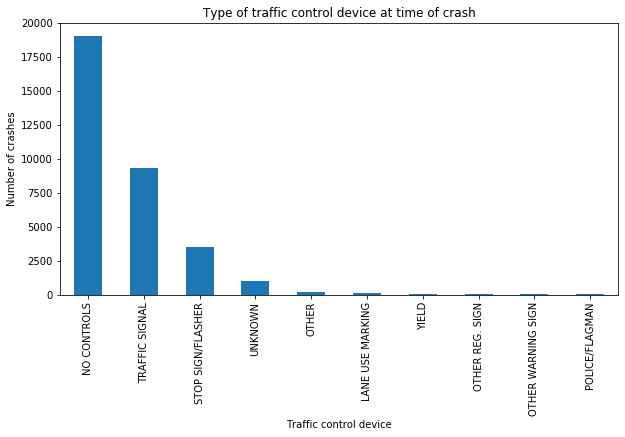

In [95]:
# Plotting a Histogram of Traffic control device
crashes_sample.TRAFFIC_CONTROL_DEVICE.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Type of traffic control device at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('Traffic control device');

In [96]:
crashes_sample.groupby(['DEVICE_CONDITION']).size()

DEVICE_CONDITION
FUNCTIONING IMPROPERLY        170
FUNCTIONING PROPERLY        11775
MISSING                         5
NO CONTROLS                 19287
NOT FUNCTIONING               113
OTHER                         267
UNKNOWN                      1780
WORN REFLECTIVE MATERIAL       11
dtype: int64

In [97]:
crashes_sample.groupby(['WEATHER_CONDITION']).size()

WEATHER_CONDITION
BLOWING SAND, SOIL, DIRT        1
BLOWING SNOW                    5
CLEAR                       26192
CLOUDY/OVERCAST              1090
FOG/SMOKE/HAZE                 59
FREEZING RAIN/DRIZZLE          46
OTHER                         118
RAIN                         3145
SEVERE CROSS WIND GATE          6
SLEET/HAIL                     61
SNOW                         1351
UNKNOWN                      1334
dtype: int64

In [1]:
# Plotting a Histogram of WEATHER_CONDITION
crashes_sample.WEATHER_CONDITION.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Type of weather at time of crash")
plt.ylabel('Number of crashes')
plt.xlabel('WEATHER_CONDITION');

NameError: name 'crashes_sample' is not defined

In [99]:
crashes_sample.groupby(['DAMAGE']).size()

DAMAGE
$500 OR LESS      4297
$501 - $1,500     9500
OVER $1,500      19611
dtype: int64

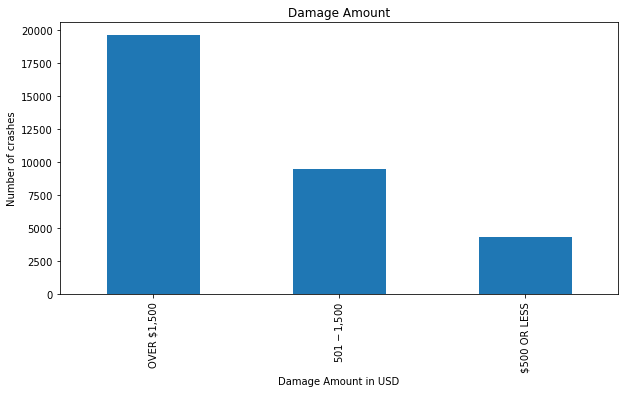

In [100]:
# Plotting a Histogram of DAMAGE amount
crashes_sample.DAMAGE.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Damage Amount")
plt.ylabel('Number of crashes')
plt.xlabel('Damage Amount in USD');

In [101]:
crashes_sample.groupby(['CRASH_TYPE']).size()

CRASH_TYPE
INJURY AND / OR TOW DUE TO CRASH     9341
NO INJURY / DRIVE AWAY              24067
dtype: int64

In [102]:
crashes_sample.groupby(['TRAFFICWAY_TYPE']).size()

TRAFFICWAY_TYPE
ALLEY                                535
CENTER TURN LANE                     323
DIVIDED - W/MEDIAN (NOT RAISED)     5718
DIVIDED - W/MEDIAN BARRIER          2029
DRIVEWAY                             117
FIVE POINT, OR MORE                   28
FOUR WAY                            1174
L-INTERSECTION                         8
NOT DIVIDED                        15080
NOT REPORTED                          15
ONE-WAY                             4418
OTHER                                919
PARKING LOT                         2243
RAMP                                 116
ROUNDABOUT                             7
T-INTERSECTION                       247
TRAFFIC ROUTE                         14
UNKNOWN                              313
UNKNOWN INTERSECTION TYPE             71
Y-INTERSECTION                        33
dtype: int64

In [103]:
crashes_sample.groupby(['ALIGNMENT']).size()

ALIGNMENT
CURVE ON GRADE              70
CURVE ON HILLCREST          22
CURVE, LEVEL               262
STRAIGHT AND LEVEL       32502
STRAIGHT ON GRADE          439
STRAIGHT ON HILLCREST      113
dtype: int64

In [104]:
crashes_sample.groupby(['ROADWAY_SURFACE_COND']).size()

ROADWAY_SURFACE_COND
DRY                24781
ICE                  315
OTHER                 82
SAND, MUD, DIRT       16
SNOW OR SLUSH       1293
UNKNOWN             2095
WET                 4826
dtype: int64

In [105]:
crashes_sample.groupby(['ROAD_DEFECT']).size()

ROAD_DEFECT
DEBRIS ON ROADWAY       33
NO DEFECTS           28012
OTHER                  183
RUT, HOLES             302
SHOULDER DEFECT         81
UNKNOWN               4665
WORN SURFACE           132
dtype: int64

In [106]:
crashes_sample.groupby(['PRIM_CONTRIBUTORY_CAUSE']).size()

PRIM_CONTRIBUTORY_CAUSE
ANIMAL                                                                                 32
BICYCLE ADVANCING LEGALLY ON RED LIGHT                                                  5
CELL PHONE USE OTHER THAN TEXTING                                                      53
DISREGARDING OTHER TRAFFIC SIGNS                                                       73
DISREGARDING ROAD MARKINGS                                                             40
DISREGARDING STOP SIGN                                                                394
DISREGARDING TRAFFIC SIGNALS                                                          668
DISREGARDING YIELD SIGN                                                                11
DISTRACTION - FROM INSIDE VEHICLE                                                     218
DISTRACTION - FROM OUTSIDE VEHICLE                                                    168
DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.) 

In [107]:
crashes_sample.groupby(['SEC_CONTRIBUTORY_CAUSE']).size()

SEC_CONTRIBUTORY_CAUSE
ANIMAL                                                                                 14
BICYCLE ADVANCING LEGALLY ON RED LIGHT                                                 16
CELL PHONE USE OTHER THAN TEXTING                                                      29
DISREGARDING OTHER TRAFFIC SIGNS                                                       30
DISREGARDING ROAD MARKINGS                                                             46
DISREGARDING STOP SIGN                                                                 88
DISREGARDING TRAFFIC SIGNALS                                                          113
DISREGARDING YIELD SIGN                                                                 7
DISTRACTION - FROM INSIDE VEHICLE                                                     107
DISTRACTION - FROM OUTSIDE VEHICLE                                                     71
DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)  

In [108]:
crashes_sample.groupby(['STREET_NO']).size().nunique()

104

In [109]:
crashes_sample.groupby(['STREET_DIRECTION']).size()

STREET_DIRECTION
E     2332
N     8093
S    10885
W    12098
dtype: int64

In [110]:
crashes_sample.groupby(['STREET_NAME']).size().nunique()

147

In [111]:
crashes_sample.groupby(['NUM_UNITS']).size()

NUM_UNITS
1      1981
2     28922
3      1975
4       405
5        79
6        23
7        15
8         4
9         1
10        1
11        1
12        1
dtype: int64

In [112]:
crashes_sample.groupby(['BEAT_OF_OCCURRENCE']).size().nunique()

149

In [113]:
crashes_sample.groupby(['PHOTOS_TAKEN_I']).size()

PHOTOS_TAKEN_I
N    111
Y    296
dtype: int64

In [114]:
crashes_sample.groupby(['WORK_ZONE_I']).size()

WORK_ZONE_I
N     43
Y    158
dtype: int64

In [115]:
crashes_sample.groupby(['WORK_ZONE_TYPE']).size()

WORK_ZONE_TYPE
CONSTRUCTION    106
MAINTENANCE      21
UNKNOWN          22
UTILITY           9
dtype: int64

In [116]:
crashes_sample.groupby(['WORKERS_PRESENT_I']).size()

WORKERS_PRESENT_I
N     5
Y    39
dtype: int64

In [117]:
crashes_sample.groupby(['DOORING_I']).size()

DOORING_I
N    37
Y    72
dtype: int64

In [118]:
crashes_sample.groupby(['STATEMENTS_TAKEN_I']).size()

STATEMENTS_TAKEN_I
N    128
Y    601
dtype: int64

In [119]:
crashes_sample.groupby(['CRASH_DATE_EST_I']).size()

CRASH_DATE_EST_I
N     334
Y    2003
dtype: int64

In [120]:
crashes_sample.groupby(['INTERSECTION_RELATED_I']).size()

INTERSECTION_RELATED_I
N     370
Y    7523
dtype: int64

In [121]:
crashes_sample.groupby(['NOT_RIGHT_OF_WAY_I']).size()

NOT_RIGHT_OF_WAY_I
N     136
Y    1447
dtype: int64

In [122]:
crashes_sample.groupby(['HIT_AND_RUN_I']).size()

HIT_AND_RUN_I
N     422
Y    9272
dtype: int64

In [123]:
crashes_columnnames = crashes_sample.columns
crashes_columnnames

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [124]:
crashes_sample.groupby(['CRASH_RECORD_ID', 'RD_NO']).size().reset_index(name='count')

,CRASH_RECORD_ID,RD_NO,count
0,000704692fa98ef82f8a4e2c7bec64f93e2d6cdeaa5565...,JD138256,1
1,0008041ffe09ddf4fcd6168d7889133f6fb64bb549996e...,JD148965,1
2,0008f970cc79c9ca782035390e8e4e76359b2e5438f313...,JD103972,1
3,000c1910dc5e9e2ce9a85bd9888d3b1e6b89cafb838625...,JD285831,1
4,000cf9cc04e934e53597818199b6ecc704f75e1835992f...,JC156225,1
...,...,...,...
33016,fff23151fcc7f3bbdcc41a4097df5deddc77ef2d83ede7...,JB328288,1
33017,fff5fecdfded6049c8014c9a1c4825844c36eb67f4863a...,JC428201,1
33018,fffdc264aa78cf9d4def4877aa30015df2b85c08aabd72...,JA540909,1
33019,fffebd86f6cb0f5e234dc69f56ac50363d5bb04a3071c5...,JC379556,1


In [125]:
crashes_sample.groupby(['RD_NO']).size().count() #33021

33021

In [126]:
crashes_sample['CRASH_RECORD_ID'].nunique() # 33408 unique ID

33408

In [127]:
vehicles_sample['CRASH_RECORD_ID'].nunique() # 36923 unique ID

36923

In [128]:
people_sample['CRASH_RECORD_ID'].nunique() #36826 unique ID

36826

### check if any duplicated rows of columns

In [129]:
sum(crashes_sample.duplicated()) #no duplicate rows based on all columns

0

In [130]:
sum(vehicles_sample.duplicated()) #no duplicate rows based on all columns

0

In [131]:
sum(people_sample.duplicated()) #no duplicate rows based on all columns

0

In [5]:
crashes_sample.columns.duplicated() # no duplicate columns in crashes_samples

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [6]:
sum(crashes_sample.columns.duplicated()

0

In [133]:
vehicles_sample.columns.duplicated() # no duplicate columns in vehicles_samples

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [134]:
people_sample.columns.duplicated() # no duplicate columns in people_samples

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### People

In [135]:
people_sample.groupby(['SEAT_NO']).size()

SEAT_NO
1.0      732
2.0      706
3.0     8255
4.0     2332
5.0      853
6.0     2937
7.0      340
8.0       21
10.0     390
11.0     168
12.0     480
dtype: int64

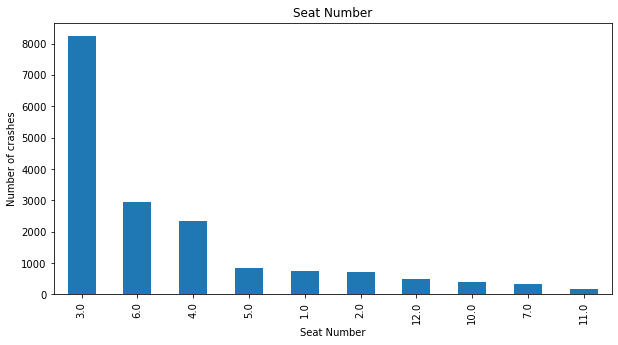

In [136]:
# Plotting a Histogram of Seat Number
people_sample.SEAT_NO.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Seat Number")
plt.ylabel('Number of crashes')
plt.xlabel('Seat Number');

#1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right

In [137]:
people_sample.groupby(['SEX']).size()

SEX
F    30946
M    43002
X     6828
dtype: int64

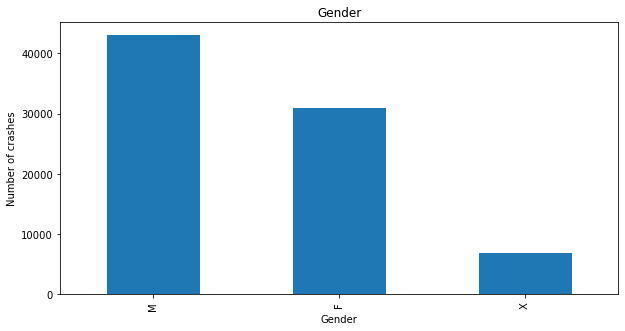

In [138]:
# Plotting a Histogram of Gender
people_sample.SEX.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Gender")
plt.ylabel('Number of crashes')
plt.xlabel('Gender');

In [139]:
people_sample.groupby(['AGE']).size()

AGE
0.0      716
1.0      217
2.0      201
3.0      165
4.0      178
        ... 
100.0      3
101.0      1
102.0      1
103.0      1
110.0      1
Length: 105, dtype: int64

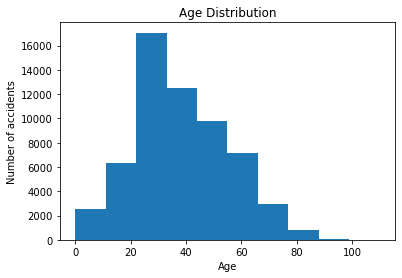

In [140]:
x = people_sample.AGE
plt.hist(x, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of accidents')

plt.show()

In [141]:
people_sample.groupby(['INJURY_CLASSIFICATION']).size()

INJURY_CLASSIFICATION
FATAL                          41
INCAPACITATING INJURY         823
NO INDICATION OF INJURY     74612
NONINCAPACITATING INJURY     4189
REPORTED, NOT EVIDENT        2334
dtype: int64

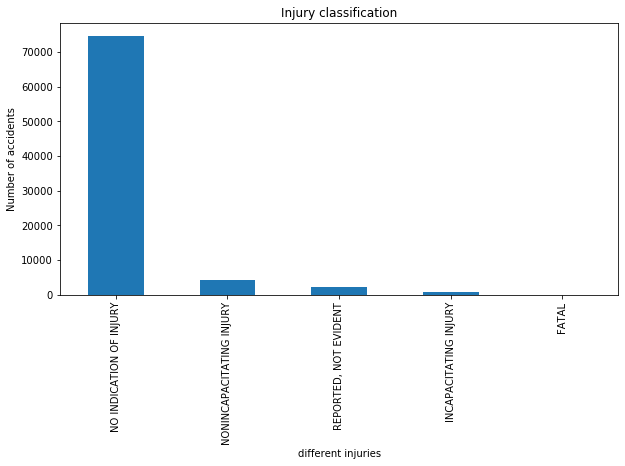

In [142]:
# Plotting a Histogram of injury classification
people_sample.INJURY_CLASSIFICATION.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Injury classification')
plt.xlabel('different injuries')
plt.ylabel('Number of accidents')

plt.show()

In [143]:
people_sample.groupby(['DRIVER_ACTION']).size()

DRIVER_ACTION
CELL PHONE USE OTHER THAN TEXTING      100
DISREGARDED CONTROL DEVICES           1143
EMERGENCY VEHICLE ON CALL               71
EVADING POLICE VEHICLE                 114
FAILED TO YIELD                       5946
FOLLOWED TOO CLOSELY                  4150
IMPROPER BACKING                      1967
IMPROPER LANE CHANGE                  1704
IMPROPER PARKING                       232
IMPROPER PASSING                      1415
IMPROPER TURN                         1703
LICENSE RESTRICTIONS                     4
NONE                                 23377
OTHER                                 5768
OVERCORRECTED                           88
STOPPED SCHOOL BUS                       7
TEXTING                                 30
TOO FAST FOR CONDITIONS               1120
UNKNOWN                              15451
WRONG WAY/SIDE                         279
dtype: int64

In [144]:
people_sample.groupby(['DRIVER_VISION']).size()

DRIVER_VISION
BLINDED - HEADLIGHTS          3
BLINDED - SUNLIGHT           71
BLOWING MATERIALS             5
BUILDINGS                    26
EMBANKMENT                    2
HILLCREST                     3
MOVING VEHICLES             407
NOT OBSCURED              35090
OTHER                       690
PARKED VEHICLES             235
SIGNBOARD                     2
TREES, PLANTS                39
UNKNOWN                   27863
WINDSHIELD (WATER/ICE)      227
dtype: int64

In [145]:
people_sample.groupby(['PHYSICAL_CONDITION']).size()

PHYSICAL_CONDITION
EMOTIONAL                         163
FATIGUED/ASLEEP                   187
HAD BEEN DRINKING                  51
ILLNESS/FAINTED                    72
IMPAIRED - ALCOHOL                337
IMPAIRED - ALCOHOL AND DRUGS       13
IMPAIRED - DRUGS                   35
MEDICATED                          10
NORMAL                          43841
OTHER                             192
REMOVED BY EMS                    294
UNKNOWN                         19533
dtype: int64

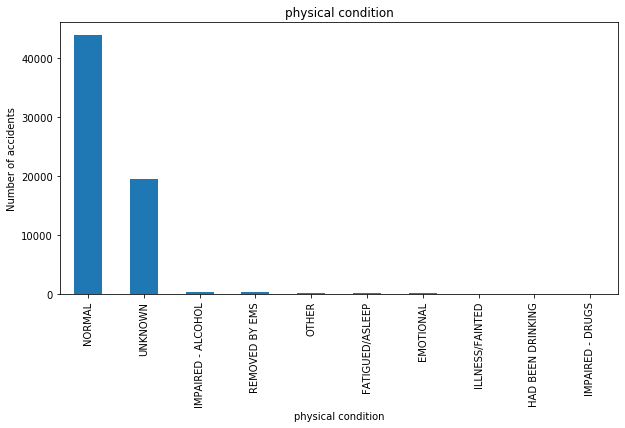

In [146]:
# Plotting a Histogram of injury classification
people_sample.PHYSICAL_CONDITION.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('physical condition')
plt.xlabel('physical condition')
plt.ylabel('Number of accidents')

plt.show()

In [147]:
people_sample.groupby(['BAC_RESULT']).size() # maybe deleted the column?
# Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian or cyclist results)

BAC_RESULT
TEST NOT OFFERED                   63710
TEST PERFORMED, RESULTS UNKNOWN      156
TEST REFUSED                         720
TEST TAKEN                           165
dtype: int64

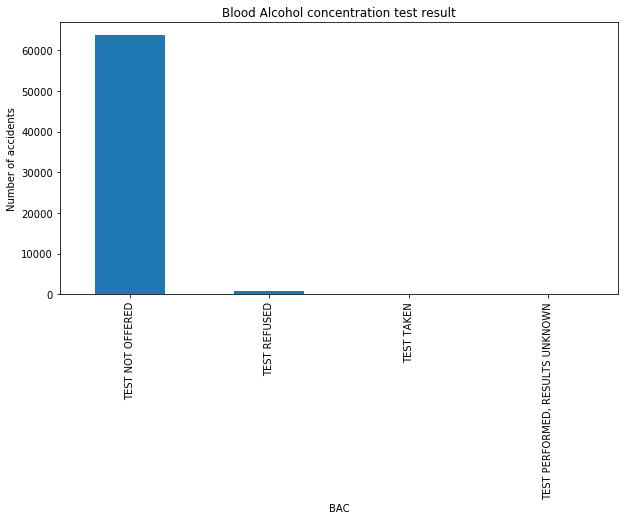

In [148]:
# Plotting a Histogram of injury classification
people_sample.BAC_RESULT.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Blood Alcohol concentration test result')
plt.xlabel('BAC')
plt.ylabel('Number of accidents')

plt.show()

In [149]:
people_sample.groupby(['BAC_RESULT VALUE']).size() # too little sample to analyze 

BAC_RESULT VALUE
0.00    11
0.01     1
0.02     1
0.03     1
0.07     1
0.08     1
0.10     5
0.11    10
0.12     6
0.13     5
0.14    10
0.15     7
0.16     5
0.17    10
0.18     4
0.19     6
0.20     8
0.21    10
0.22     4
0.23     3
0.24     2
0.25     4
0.26     2
0.27     3
0.28     2
0.29     1
0.30     2
0.31     2
0.32     2
0.33     1
0.35     1
0.38     1
0.41     1
0.44     1
dtype: int64

### Vehicle

In [153]:
vehicles_sample.groupby(['RD_NO']).size()

RD_NO
CJ162000    2
JA103057    2
JA103876    1
JA114629    2
JA114652    2
           ..
JM171292    2
JP169262    2
MB118844    2
RD102796    2
ZB167408    2
Length: 33021, dtype: int64

In [154]:
vehicles_sample.groupby(['UNIT_NO']).size()

UNIT_NO
0         2
1     37182
2     34869
3      2784
4       584
5       152
6        55
7        26
8         9
9         4
10        3
11        2
12        1
dtype: int64

CRASH_DAY_OF_WEEK
1    4115
2    4687
3    4660
4    4799
5    4756
6    5447
7    4944
dtype: int64

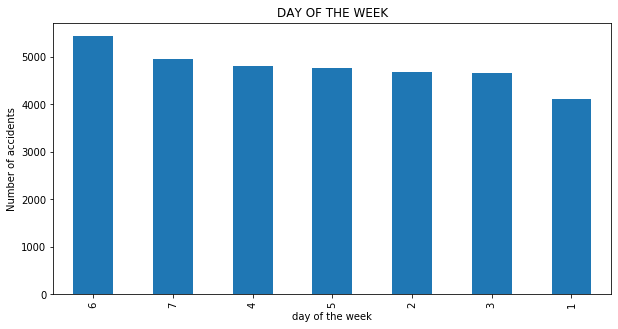

In [10]:
display(crashes_sample.groupby(["CRASH_DAY_OF_WEEK"]).size())
crashes_sample.CRASH_DAY_OF_WEEK.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('DAY OF THE WEEK')
plt.xlabel('day of the week')
plt.ylabel('Number of accidents')

plt.show()

In [11]:
people_sample[people_sample['PERSON_TYPE'] == 'PEDESTRIAN'] #1025 rows × 30 columns

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
17,O925931,PEDESTRIAN,e90b0b0bc531bc185df85ec9cb0507bbbaa6c3b5a19be3...,JD310873,NaN,07/26/2020 05:34:00 PM,NaN,CHICAGO,IL,60632,...,NaN,NONE,OTHER,NORMAL,PLAYING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
92,O229762,PEDESTRIAN,8c4b7dd1512482337a51ed2f980a09b49875857b6c8ce2...,JA455269,NaN,10/02/2017 01:38:00 PM,NaN,OAKLAWN,IL,60453,...,NaN,NONE,NOT OBSCURED,NORMAL,NOT AT INTERSECTION,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
166,O230636,PEDESTRIAN,0e43941bfd2675323df74ea35f8d96c3973a1c031b2ed0...,JA457018,NaN,10/03/2017 04:52:00 PM,NaN,NaN,NaN,NaN,...,NaN,NONE,UNKNOWN,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,NaN,NaN
168,O230730,PEDESTRIAN,b8f441ee9724ab2bd816ecf24b67fe485fde69c0509083...,JA456942,NaN,10/03/2017 04:10:00 PM,NaN,CHICAGO,NaN,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,STANDING IN ROADWAY,CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,NaN,NaN
177,O230903,PEDESTRIAN,4977ea6e6a9c016767f5becbabb9061f6c53c29010a5a1...,JA457642,NaN,10/04/2017 07:30:00 AM,NaN,CHICAGO,IL,60618,...,NaN,OTHER,OTHER,OTHER,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81454,O919561,PEDESTRIAN,f305e2efab01dc82184a151473ed62a9fde1deb030f09f...,JD299506,NaN,07/16/2020 03:28:00 PM,NaN,CHICAGO,IL,60629,...,NaN,NONE,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,NOT IN ROADWAY,TEST NOT OFFERED,NaN,NaN
81469,O919892,PEDESTRIAN,b035a4cc316d7f3d5e0b9b237d599aafc74bceda88689c...,JD299931,NaN,07/16/2020 10:00:00 PM,NaN,NaN,NaN,NaN,...,NaN,FAILED TO YIELD,NOT OBSCURED,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
81470,O919893,PEDESTRIAN,b035a4cc316d7f3d5e0b9b237d599aafc74bceda88689c...,JD299931,NaN,07/16/2020 10:00:00 PM,NaN,ST PAUL,MN,NaN,...,NaN,OTHER,NOT OBSCURED,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
81953,O924637,PEDESTRIAN,79d545f97ef1482f06a56ca937b8a2470ce47917550b1e...,JD308699,NaN,07/24/2020 06:00:00 PM,NaN,CHICAGO,IL,60651,...,NaN,NONE,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,NaN,NaN


In [12]:
people_sample[people_sample['PERSON_TYPE'] == 'PEDESTRIAN'].groupby(["PEDPEDAL_ACTION"]).size()

PEDPEDAL_ACTION
AGAINST TRAFFIC                                       18
CROSSING - AGAINST SIGNAL                             54
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     39
CROSSING - NO CONTROLS (AT INTERSECTION)              45
CROSSING - NO CONTROLS (NOT AT INTERSECTION)          78
CROSSING - WITH SIGNAL                               265
ENTER FROM DRIVE/ALLEY                                 5
INTOXICATED PED/PEDAL                                  7
NO ACTION                                             47
NOT AT INTERSECTION                                   60
OTHER ACTION                                         141
PARKED VEHICLE                                        16
PLAYING IN ROADWAY                                     8
PLAYING/WORKING ON VEHICLE                             4
SCHOOL BUS (WITHIN 50 FT.)                             2
STANDING IN ROADWAY                                   35
TO/FROM DISABLED VEHICLE                               1
TURNING LEFT   

In [23]:
people_sample[people_sample['PERSON_TYPE'] == 'PEDESTRIAN'].groupby(["PEDPEDAL_LOCATION"]).size()

PEDPEDAL_LOCATION
BIKEWAY              4
DRIVEWAY ACCESS     15
IN CROSSWALK       447
IN ROADWAY         382
NOT IN ROADWAY      65
SHOULDER             5
UNKNOWN/NA         107
dtype: int64

In [21]:
people_sample[people_sample['PERSON_TYPE'] == 'PEDESTRIAN'].groupby(["PEDPEDAL_LOCATION"]).count()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
PEDPEDAL_LOCATION,,,,,,,,,,,,,,,,,,,,,
BIKEWAY,4,4,4,4,0,4,0,4,4,3,...,3,0,4,4,4,4,4,4,0,0
DRIVEWAY ACCESS,15,15,15,14,0,15,0,14,14,12,...,11,0,12,13,14,15,15,15,0,0
IN CROSSWALK,447,447,447,414,0,447,0,427,417,319,...,284,0,398,394,421,447,447,431,0,4
IN ROADWAY,382,382,382,351,0,382,0,356,353,251,...,269,0,338,338,361,382,382,366,0,1
NOT IN ROADWAY,65,65,65,61,0,65,0,61,61,44,...,47,0,55,54,57,65,65,63,0,1
SHOULDER,5,5,5,3,0,5,0,5,5,5,...,3,0,5,5,5,5,5,5,0,0
UNKNOWN/NA,107,107,107,96,0,107,0,98,96,69,...,62,0,94,93,97,107,107,104,0,0


In [26]:
display(people_sample[people_sample['PERSON_ID'].str.match('P')]) #17,214 rows start with "P"
people_sample[people_sample['PERSON_ID'].str.match('O')] #64,835 rows start with "O"

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
30,P211417,PASSENGER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,3.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585,P213701,PASSENGER,6232608703805c008ded983adea0a359f171fc2faa1bd6...,JD328073,887358.0,08/10/2020 03:08:00 PM,3.0,CHICAGO,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5280,P211625,PASSENGER,b2b6938d2d17c886604bd689d8db8b8ddd5eea644c4d53...,JD311981,878448.0,07/27/2020 04:30:00 PM,3.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,P211637,PASSENGER,409ae9f90fff2f6f179be0150d7d3ce521e834572d8042...,JD312101,878506.0,07/27/2020 04:45:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5436,P211666,PASSENGER,9059dd07be42310025c5cbd473b5646b9e593b5679e647...,JD312264,878604.0,07/27/2020 05:10:00 PM,4.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82044,P211331,PASSENGER,77c6896f7590443e32852c8ab7c1b60d1b05dec415263b...,JD309784,877262.0,07/25/2020 04:50:00 PM,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82045,P211347,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,JD309798,877337.0,07/25/2020 05:25:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82046,P211349,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,JD309798,877342.0,07/25/2020 05:25:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82047,P211350,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,JD309798,877342.0,07/25/2020 05:25:00 PM,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O925562,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O925563,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877518.0,07/26/2020 01:50:00 AM,NaN,CHICAGO,IL,60653,...,NaN,OTHER,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O925608,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877558.0,07/26/2020 03:44:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST REFUSED,NaN,NaN
3,O925609,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877560.0,07/26/2020 03:44:00 AM,NaN,EVANSTON,IL,60201,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O925693,DRIVER,b19286bd551b80e04f20663d46a3fae8238a8f40ddee4c...,JD310543,877642.0,07/26/2020 11:50:00 AM,NaN,CHICAGO,IL,60638,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82033,O925763,DRIVER,51754a24fdb04a18409ffd68b1a65fd35af77cf5d3cd7e...,JD310672,877723.0,07/25/2020 04:05:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
82034,O925764,DRIVER,51754a24fdb04a18409ffd68b1a65fd35af77cf5d3cd7e...,JD310672,877714.0,07/25/2020 04:05:00 PM,NaN,CHICAGO,IL,60644,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
82035,O925861,DRIVER,5d7eca39355a59a295fc915e811bf504f04a0da234e32d...,JD310847,877793.0,07/25/2020 04:30:00 PM,NaN,CHICAGO,IL,60653,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
82036,O925862,DRIVER,5d7eca39355a59a295fc915e811bf504f04a0da234e32d...,JD310847,877796.0,07/25/2020 04:30:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [29]:
from datetime import datetime
my_datetime = datetime.strptime('07/26/2020 01:50:00 AM', '%m/%d/%Y %H:%M:%S %p') 
people_trail = people_sample[["CRASH_DATE"]]

In [32]:
people_trail

,CRASH_DATE
0,07/26/2020 01:50:00 AM
1,07/26/2020 01:50:00 AM
2,07/26/2020 03:44:00 AM
3,07/26/2020 03:44:00 AM
4,07/26/2020 11:50:00 AM
...,...
82044,07/25/2020 04:50:00 PM
82045,07/25/2020 05:25:00 PM
82046,07/25/2020 05:25:00 PM
82047,07/25/2020 05:25:00 PM


In [5]:
# test on cramers_correction

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [19]:
# test the correlation between PERSON_TYPE and INJURY_CLASSIFICATION
confusion_matrix = pd.crosstab(people_sample['PERSON_TYPE'], people_sample['INJURY_CLASSIFICATION'])
confusion_matrix

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
PERSON_TYPE,,,,,
BICYCLE,3,59,176,296,59
DRIVER,26,416,59095,2242,1343
NON-CONTACT VEHICLE,0,0,10,0,0
NON-MOTOR VEHICLE,0,0,53,2,3
PASSENGER,4,182,15145,1086,774
PEDESTRIAN,8,166,133,563,155


In [24]:
corr_matrix = confusion_matrix.corr()

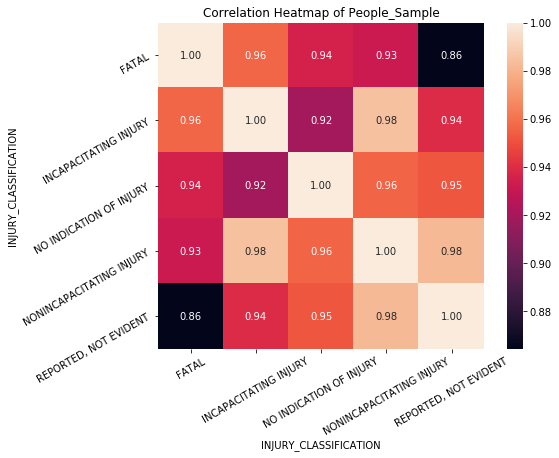

In [25]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of People_Sample')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    

In [48]:
confusion_matrix = pd.crosstab(people_sample['PERSON_TYPE'], people_sample['INJURY_CLASSIFICATION'])
confusion_matrix

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
PERSON_TYPE,,,,,
BICYCLE,3,59,176,296,59
DRIVER,26,416,59095,2242,1343
NON-CONTACT VEHICLE,0,0,10,0,0
NON-MOTOR VEHICLE,0,0,53,2,3
PASSENGER,4,182,15145,1086,774
PEDESTRIAN,8,166,133,563,155


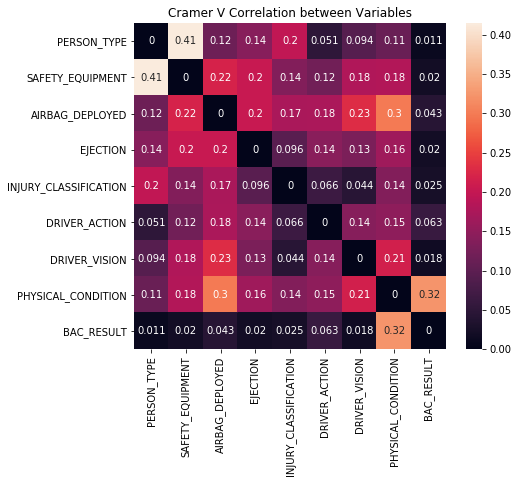

In [51]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = ["PERSON_TYPE", "SAFETY_EQUIPMENT", "AIRBAG_DEPLOYED", "EJECTION", "INJURY_CLASSIFICATION", "DRIVER_ACTION", "DRIVER_VISION", "PHYSICAL_CONDITION", "BAC_RESULT"]
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(people_sample[col1], people_sample[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [52]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [33]:
cramers_v(people_sample['PERSON_TYPE'], people_sample['INJURY_CLASSIFICATION'])

0.19605242416337476

In [37]:
import itertools

In [56]:
people_sample.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,80306.000000,17214.000000,59254.000000,134.000000
mean,602088.561652,4.193099,37.805633,0.169328
std,214429.123290,2.235407,17.150075,0.087447
min,224185.000000,1.000000,0.000000,0.000000
25%,414668.250000,3.000000,25.000000,0.120000
50%,606222.500000,3.000000,35.000000,0.170000
75%,795201.000000,6.000000,50.000000,0.210000
max,920208.000000,12.000000,110.000000,0.440000


In [57]:
crashes_sample.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,33408.000000,10996.000000,33408.000000,33408.000000,33408.000000,33324.000000,33324.00000,33324.000000,33324.000000,33324.000000,33324.000000,33324.0,33408.000000,33408.000000,33408.000000,33215.000000,33215.000000
mean,28.420318,2.498272,3662.141134,1250.213332,2.037895,0.195205,0.00108,0.021936,0.109501,0.062688,2.030729,0.0,13.152029,4.122815,6.660500,41.856674,-87.674102
std,6.210942,1.669592,2847.516283,704.127405,0.471285,0.564194,0.03463,0.173489,0.420830,0.318674,1.220179,0.0,5.542940,1.980078,3.438983,0.335981,0.682890
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.933994
25%,30.000000,2.000000,1240.000000,722.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.786257,-87.722139
50%,30.000000,2.000000,3199.000000,1214.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.876677,-87.674754
75%,30.000000,4.000000,5518.000000,1822.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924907,-87.633925
max,70.000000,99.000000,13758.000000,2535.000000,12.000000,8.000000,2.00000,5.000000,8.000000,7.000000,46.000000,0.0,23.000000,7.000000,12.000000,42.022720,0.000000


In [58]:
vehicles_sample.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,HAZMAT_REPORT_NO,MCS_REPORT_NO,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,75673.000000,75673.000000,11633.000000,73804.000000,61945.000000,73804.000000,886.000000,0.0,0.0,132.000000,3.000000,148.000000,239.000000
mean,636542.746819,1.573243,1.479756,606345.289334,2012.930955,1.088762,6578.375847,NaN,NaN,48.719697,37.333333,50.858108,112.435146
std,229743.763303,0.654345,1.119244,215477.478218,129.699968,0.879280,2878.475327,NaN,NaN,15.010589,15.947832,21.055809,1682.148492
min,228894.000000,0.000000,1.000000,224185.000000,1900.000000,0.000000,1515.000000,NaN,NaN,1.000000,19.000000,1.000000,1.000000
25%,436244.000000,1.000000,1.000000,418742.000000,2006.000000,1.000000,4145.750000,NaN,NaN,48.000000,32.000000,33.000000,2.000000
50%,642576.000000,2.000000,1.000000,611440.500000,2012.000000,1.000000,6602.000000,NaN,NaN,53.000000,45.000000,56.000000,3.000000
75%,845390.000000,2.000000,2.000000,802301.500000,2016.000000,1.000000,9189.750000,NaN,NaN,53.000000,46.500000,65.750000,5.000000
max,970977.000000,12.000000,43.000000,920209.000000,9999.000000,99.000000,10831.000000,NaN,NaN,101.000000,48.000000,96.000000,26009.000000


In [63]:
# get the list of categorical columns
people_sample.select_dtypes(exclude=['int', 'float']).columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE',
       'CITY', 'STATE', 'ZIPCODE', 'SEX', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY',
       'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
       'BAC_RESULT', 'CELL_PHONE_USE'],
      dtype='object')

In [61]:
# get the list of numerical columns
people_sample.select_dtypes(include=['int', 'float']).columns

Index(['VEHICLE_ID', 'SEAT_NO', 'AGE', 'BAC_RESULT VALUE'], dtype='object')